In [3]:
import os

folder_1 = '../lab5/Formes/formes1'  
folder_2 = '../lab5/Formes/formes2'  

images_folder_1 = [f for f in os.listdir(folder_1) if f.endswith('.gif')]
images_folder_2 = [f for f in os.listdir(folder_2) if f.endswith('.gif')]

if not images_folder_1:
    print("Aucune image trouvée dans le dossier 1.")
else:
    print(f"Images trouvées dans le dossier 1 : {images_folder_1}")

if not images_folder_2:
    print("Aucune image trouvée dans le dossier 2.")
else:
    print(f"Images trouvées dans le dossier 2 : {images_folder_2}")


Images trouvées dans le dossier 1 : ['apple-1.gif', 'apple-2.gif', 'apple-3.gif', 'apple-4.gif', 'bell-1.gif', 'bell-2.gif', 'bell-3.gif', 'bell-4.gif', 'bird-13.gif', 'bird-14.gif', 'bird-7.gif', 'bird-8.gif', 'camel-1.gif', 'camel-2.gif', 'camel-3.gif', 'camel-4.gif', 'device0-1.gif', 'device0-2.gif', 'device0-3.gif', 'device0-4.gif']
Images trouvées dans le dossier 2 : ['apple-5.gif', 'bell-5.gif', 'bird-15.gif', 'camel-5.gif', 'device0-5.gif']


In [ ]:
import cv2
import numpy as np
import json
from PIL import Image


def calculate_hu_moments(image_path):
    img_pil = Image.open(image_path)
    img_pil = img_pil.convert('L')  # Convert to grayscale
    image = np.array(img_pil)

    # Thresholding to obtain binary image
    _, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if len(contours) == 0:
        return None

    
    largest_contour = max(contours, key=lambda cnt: len(cnt))


    moments = cv2.moments(largest_contour)
    hu_moments = cv2.HuMoments(moments).flatten()

    hu_moments = -np.sign(hu_moments) * np.log10(np.abs(hu_moments + 1e-10))
    return hu_moments.tolist()

hu_moments_data = {}
for img_name in images_folder_1:
    img_path = os.path.join(folder_1, img_name)
    hu_moments = calculate_hu_moments(img_path)
    if hu_moments is not None:
        hu_moments_data[img_name] = hu_moments

output_file = 'hu_moments_folder1.json'
with open(output_file, 'w') as f:
    json.dump(hu_moments_data, f, indent=4)

print(f"Les moments de Hu ont été sauvegardés dans '{output_file}'.")


Les moments de Hu ont été sauvegardés dans 'hu_moments_folder1.json'.


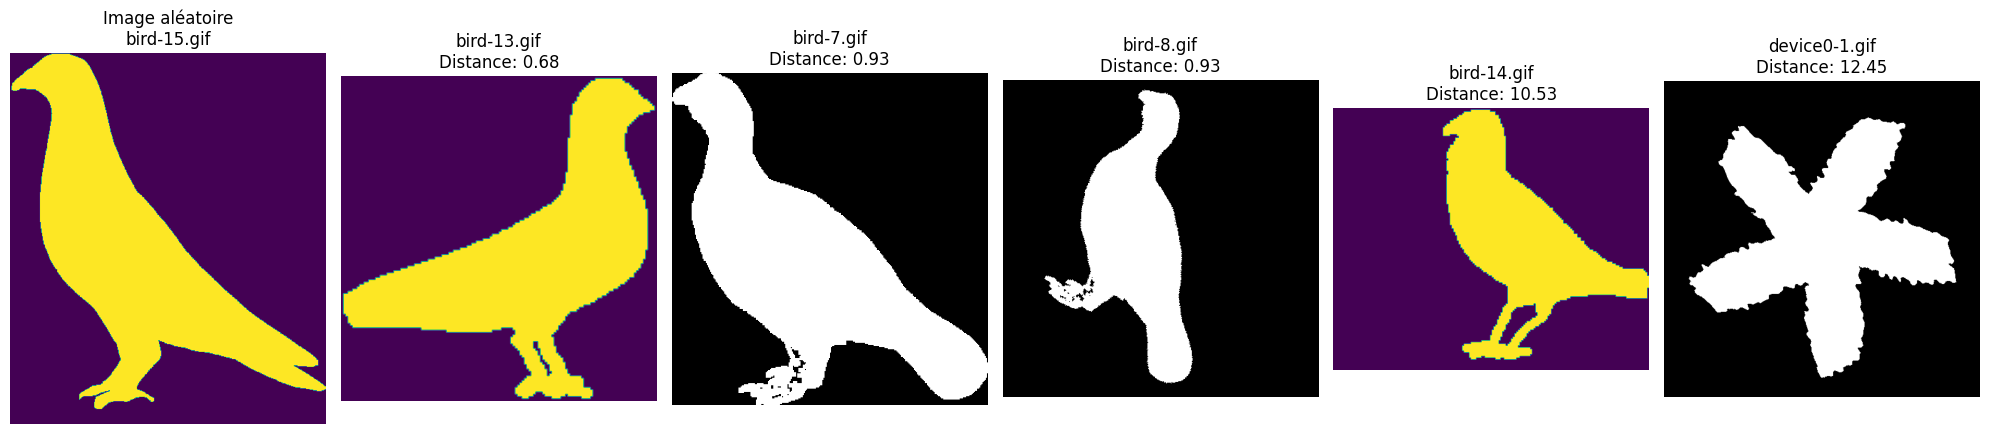

In [ ]:
import random
import matplotlib.pyplot as plt

with open('hu_moments_folder1.json', 'r') as f:
    hu_moments_data = json.load(f)

def calculate_similarity(hu1, hu2):
    return np.linalg.norm(np.array(hu1) - np.array(hu2))

random_image_name = random.choice(images_folder_2)
random_image_path = os.path.join(folder_2, random_image_name)
random_image_hu = calculate_hu_moments(random_image_path)

similarities = []
for img_name, hu_moments in hu_moments_data.items():
    distance = calculate_similarity(random_image_hu, hu_moments)
    similarities.append((img_name, distance))

similarities = sorted(similarities, key=lambda x: x[1])

top_5_similar = similarities[:5]

fig, axes = plt.subplots(1, 6, figsize=(20, 5))
random_image = Image.open(random_image_path)
axes[0].imshow(random_image)
axes[0].set_title(f"Image aléatoire\n{random_image_name}")
axes[0].axis('off')

for i, (img_name, distance) in enumerate(top_5_similar, start=1):
    similar_image_path = os.path.join(folder_1, img_name)
    similar_image = Image.open(similar_image_path)
    axes[i].imshow(similar_image)
    axes[i].set_title(f"{img_name}\nDistance: {distance:.2f}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()
